In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt


# Add the `src` folder to the system path
sys.path.append(os.path.abspath('../src'))

In [2]:
from fluorescence_fit import *
from main import run_fluorescence_analysis

In [3]:
file_path = '../../data/PlateReader/20250703_DOPC.xlsx'
results = run_fluorescence_analysis(
    file_path,
    results_folder='../../results/20251002_DOPC'
)

Trial 1: R^2 = 0.9992, RMSE = 0.0219
Trial 2: R^2 = 0.9988, RMSE = 0.0289
Trial 3: R^2 = 0.9984, RMSE = 0.0287
Saved: 20250703_DOPC_fit_params_Triton.csv
Saved: 20250703_DOPC_fit_plot_Triton.png
Saved: 20250703_DOPC_residual_plot_Triton.png
Saved fit plot to: 20250703_DOPC_fit_plot_noTriton_fixedkout.png
Saved residual plot to: 20250703_DOPC_residual_plot_noTriton_fixedkout.png
Saved parameters to: 20250703_DOPC_fit_params_noTriton_fixedkout.csv
Results saved to ../../results/20251002_DOPC/20250703_DOPC_20251002-17
All results saved to ../../results/20251002_DOPC/20250703_DOPC_results.joblib


In [4]:
file_path = '../../data/PlateReader/20250716_DOPC.xlsx'
results = run_fluorescence_analysis(
    file_path,
    results_folder='../../results/20251002_DOPC'
)

Trial 1: R^2 = 0.9138, RMSE = 0.2795
Trial 2: R^2 = 0.9379, RMSE = 0.2671
Trial 3: R^2 = 0.9463, RMSE = 0.2325
Saved: 20250716_DOPC_fit_params_Triton.csv
Saved: 20250716_DOPC_fit_plot_Triton.png
Saved: 20250716_DOPC_residual_plot_Triton.png
Saved fit plot to: 20250716_DOPC_fit_plot_noTriton_fixedkout.png
Saved residual plot to: 20250716_DOPC_residual_plot_noTriton_fixedkout.png
Saved parameters to: 20250716_DOPC_fit_params_noTriton_fixedkout.csv
Results saved to ../../results/20251002_DOPC/20250716_DOPC_20251002-17
All results saved to ../../results/20251002_DOPC/20250716_DOPC_results.joblib


In [5]:
import os
import joblib

results_folder = '../../results/20251002_DOPC/'

joblib_files = [f for f in os.listdir(results_folder) if f.endswith('.joblib')]

# Load them into a dictionary
all_results_loaded = {}
for f in joblib_files:
    file_path = os.path.join(results_folder, f)
    results = joblib.load(file_path)
    all_results_loaded[f] = results
    print(f"Loaded: {f}")

Loaded: 20250703_DOPC_results.joblib
Loaded: 20250716_DOPC_results.joblib


In [6]:
all_results_loaded.keys()

dict_keys(['20250703_DOPC_results.joblib', '20250716_DOPC_results.joblib'])

In [7]:
k_perm_1 = all_results_loaded['20250703_DOPC_results.joblib']['results_no_triton_fixed']['k_perm']
k_perm_2 = all_results_loaded['20250716_DOPC_results.joblib']['results_no_triton_fixed']['k_perm']

In [8]:
k_perm_1, k_perm_2

(0    0.124839
 1    0.123936
 2    0.117281
 Name: k_perm, dtype: float64,
 0    0.162820
 1    0.171477
 2    0.173674
 Name: k_perm, dtype: float64)

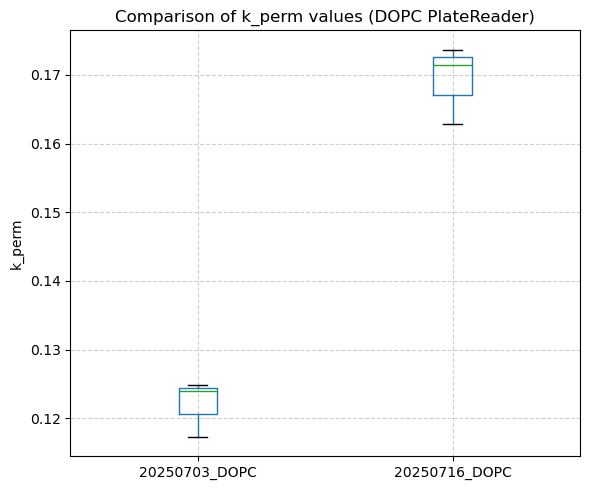

In [9]:
df_perm = pd.concat([k_perm_1, k_perm_2], axis=1)

# Plot
plt.figure(figsize=(6, 5))
df_perm.boxplot()
plt.ylabel("k_perm")
plt.xticks([1,2], ["20250703_DOPC", "20250716_DOPC"])  # explicitly set labels
plt.title("Comparison of k_perm values (DOPC PlateReader)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# file_path = '../../data/PlateReader/0.16_mM_DOPC.csv0.16_mM_DOPC.xlsx'
# results = run_fluorescence_analysis(
#     file_path,
#     results_folder='../../results/20251002_DOPC'
# )